# các thư viện cần thiết

In [1]:
!pip install -q category-encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.8 MB/s eta 0:00:00


# mô hình phân loại

## xử lý dữ liệu

In [2]:
df = pd.read_csv('music_genre.csv')
# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()
df.head(7)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic


In [3]:
df.shape


(50005, 18)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [5]:
#Độ cân bằng dữ liệu
print(df['music_genre'].value_counts())
df['music_genre'].value_counts(True)

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


,proportion
music_genre,
Electronic,0.1
Anime,0.1
Jazz,0.1
Alternative,0.1
Country,0.1
Rap,0.1
Blues,0.1
Rock,0.1
Classical,0.1


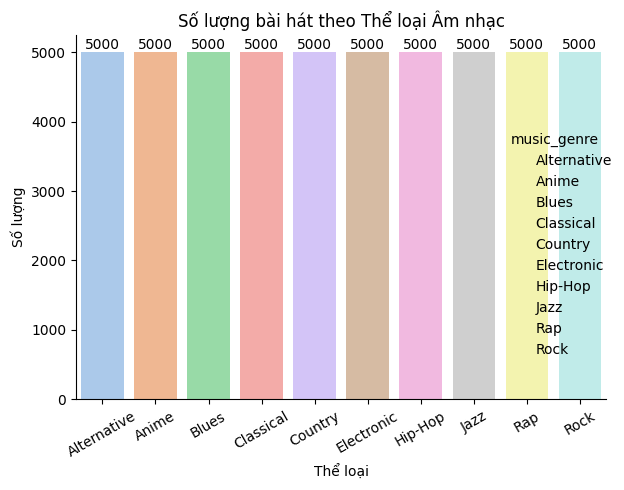

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import FuncFormatter

# Vẽ biểu đồ cột đếm theo cột 'music_genre'
f = sns.catplot(x='music_genre', data=df.sort_values('music_genre'),
                kind='count', palette='pastel')

# Lấy trục đang vẽ
ax = f.facet_axis(0, 0)

# Đặt tên nhãn trên trục X đúng thứ tự theo dataset
ax.set_xticklabels(sorted(map(str, df['music_genre'].dropna().unique())), rotation=30)



# Thêm tiêu đề và tên trục
ax.set_title('Số lượng bài hát theo Thể loại Âm nhạc')
ax.set_xlabel('Thể loại')
ax.set_ylabel('Số lượng')

# Thêm nhãn số trên đầu mỗi cột
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), value,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Chia dữ liệu

## toàn bộ dữ liệu

In [7]:
df = pd.read_csv('/content/drive/MyDrive/HM/bai_tap_giua_ki/music_genre.csv')
# Loại b ỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [8]:
#Dữ liệu liên tục
continous_data = [
    'popularity','acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

#Dữ liệu rời rạc
classified_data = ['artist_name', 'key', 'mode', 'obtained_date']

In [9]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce') #đưa dữ liệu về dạng numpy
df = df.drop_duplicates().dropna()

X = df.drop(['music_genre', 'instance_id', 'track_name'], axis=1) # tách thêm instance_id: đó là ID của các bài hát
y = df['music_genre']
print(X.shape)
print(y.shape)

(45020, 15)
(45020,)


In [10]:
X_origin = X.copy()
X_origin['obtained_date'] = pd.to_datetime(X_origin['obtained_date'], format='%d-%b', errors='coerce')
y_origin = y.copy()

In [11]:
X_origin['year'] = X_origin['obtained_date'].dt.year
X_origin['month'] = X_origin['obtained_date'].dt.month
X_origin['day_of_week'] = X_origin['obtained_date'].dt.dayofweek

# Bỏ cột gốc
X_origin = X_origin.drop(columns=['obtained_date'])

In [12]:
#Chuẩn bị dữ liệu
X_continous = df[continous_data]
X_classified = df[classified_data]
y = df['music_genre']

In [13]:
X_classified['obtained_date'] = pd.to_datetime(X_classified['obtained_date'], format='%d-%b', errors='coerce')
X_classified['year'] = X_classified['obtained_date'].dt.year
X_classified['month'] = X_classified['obtained_date'].dt.month
X_classified['day_of_week'] = X_classified['obtained_date'].dt.dayofweek

# Bỏ cột gốc
X_classified = X_classified.drop(columns=['obtained_date'])

## Mã hóa dữ liệu bằng Onehot encode và label encode trong thư viện Sklearn

In [14]:
onehot_columns = ['key', 'mode', 'year', 'month', 'day_of_week']
target_columns = ['artist_name']

# One-Hot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X_origin[onehot_columns])
ohe_cols = onehot_encoder.get_feature_names_out(onehot_columns)

# Target Encoding
target_encoder = TargetEncoder(smoothing=1.0)
X_target = target_encoder.fit_transform(X_origin[target_columns], y)
target_cols = [f"{col}_target" for col in target_columns]

# Gộp
X_encoded = np.hstack([X_onehot, X_target.values])
final_cols = np.concatenate([ohe_cols, target_cols])

X_classified_encoded_df = pd.DataFrame(X_encoded, columns=final_cols, index=X.index)



# Chuẩn hóa biến liên tục
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)
# Đưa phần liên tục về DataFrame
X_continous_scaled_df = pd.DataFrame(X_continous_scaled, columns=continous_data, index=df.index)
# Gộp hai phần lại thành DataFrame X hoàn chỉnh
X = pd.concat([X_continous_scaled_df, X_classified_encoded_df], axis=1)
# Mã hóa nhãn đầu ra y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Kích thước X:", X.shape)
print("Số lượng cột:", len(X.columns))
print()
X.head()

Kích thước X: (45020, 27)
Số lượng cột: 27



,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,day_of_week_2,day_of_week_3,day_of_week_6,artist_name_target
0,-1.109911,-0.884378,0.522585,-1.732130,1.290882,1.872550,-0.488216,0.639344,-0.187086,-0.622164,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.629521
1,-0.852739,-0.860885,0.354853,-0.022528,1.098070,2.357446,-0.432561,0.340140,-0.628606,-0.161578,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.849558
2,-1.045618,-0.889123,0.343671,-0.043517,0.587686,-0.521854,2.102795,0.734206,-0.584257,0.262424,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.000000
3,-0.659860,-0.823684,1.204697,-0.425216,0.379752,-0.550303,-0.228496,0.753536,1.431165,0.263077,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.510421
4,-0.788446,-0.884466,0.444310,0.009394,-0.047459,2.231618,-0.228496,0.466352,-0.517241,0.818601,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.996723


# dự đoán với mô hình

## dự đoán mô hình bằng sklearn

In [15]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---7:3
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train1, y_train1)
# --- dự đoán ---
y_pred1 = log.predict(X_test1)

# --- đánh giá ---
acc1 = accuracy_score(y_test1, y_pred1)
print("🎯 Độ chính xác:", acc1)
print(confusion_matrix(y_test1, y_pred1))

🎯 Độ chính xác: 0.5647860210276914
[[ 499   39   46    7  280   72   95   74   23  214]
 [  27  967  130  124   46   40    0   10    0    5]
 [  87  197  679   33  136   56    1  113    0   39]
 [  25   73   36 1121    9   33    0   48    0    5]
 [  74   18  106    5  802   74   17   52    8  190]
 [  60   24   44   19   79  845   37  158   23   51]
 [  89    0    0    0   25   16  649   29  463   85]
 [  25   18   98   75  124  222   37  707    6   44]
 [  97    0    0    0   41    9  544   15  519  126]
 [ 193    3   10    1  170   10   21   33   87  840]]


In [ ]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train2, y_train2)
# --- dự đoán ---
y_pred2 = log.predict(X_test2)

# --- đánh giá ---
acc2 = accuracy_score(y_test2, y_pred2)
print("🎯 Độ chính xác:", acc2)
print(confusion_matrix(y_test2, y_pred2))

🎯 Độ chính xác: 0.5623056419369169
[[330  23  33   5 182  53  59  51  16 147]
 [ 21 655  82  82  26  23   0   8   0   3]
 [ 54 125 453  22  98  35   1  77   0  29]
 [  9  50  22 759   7  20   0  31   0   2]
 [ 48  11  79   2 532  47  12  39   7 120]
 [ 41  17  29  18  59 556  24 105  15  29]
 [ 66   0   0   0  21  10 422  20 316  49]
 [ 16  11  64  54  82 152  27 463   4  31]
 [ 71   0   0   0  25   7 369  12 330  87]
 [129   2   7   1 112   6  18  18  56 563]]


In [ ]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---6:4
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train3, y_train3)
# --- dự đoán ---
y_pred3 = log.predict(X_test3)

# --- đánh giá ---
acc3 = accuracy_score(y_test3, y_pred3)
print("🎯 Độ chính xác:", acc3)
print(confusion_matrix(y_test3, y_pred3))

🎯 Độ chính xác: 0.5663038649489116
[[ 663   47   69    9  381   94  131   86   27  291]
 [  37 1298  171  166   59   49    0   13    0    6]
 [ 104  273  906   47  172   81    1  158    0   46]
 [  34   95   52 1491   10   43    0   67    0    8]
 [ 115   21  156    7 1050   91   22   68   12  252]
 [  93   36   65   31  103 1112   51  196   33   66]
 [ 126    0    1    0   35   22  876   36  607  105]
 [  37   24  145   94  145  299   49  946    6   64]
 [ 117    0    0    0   51   12  723   21  708  170]
 [ 239    4   12    2  217   13   32   45  112 1148]]


## tự định nghĩa lớp LogisticRegression

In [ ]:
class SoftmaxRegression:
    def __init__(self, eta=0.01, tol=1e-4, max_iter=1000, batch_size=None, check_after=20, verbose=False, random_state=None):
        self.eta = eta
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size  # nếu None => full batch
        self.check_after = check_after
        self.verbose = verbose
        self.random_state = random_state
        self.W = None

    @staticmethod
    def _softmax_stable(Z):
        Z = Z - np.max(Z, axis=0, keepdims=True)
        expZ = np.exp(Z)
        return expZ / np.sum(expZ, axis=0, keepdims=True)

    def _convert_labels(self, y):
        classes = np.unique(y)
        self.classes_ = classes
        C = len(classes)
        y_to_index = {c: i for i, c in enumerate(classes)}
        y_indexed = np.vectorize(y_to_index.get)(y)
        Y = np.eye(C)[y_indexed].T  # (C, N)
        return Y, C

    def fit(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        X = X.T  # (d, N)
        d, N = X.shape
        Y, C = self._convert_labels(y)

        W = np.random.randn(d, C) * 0.01
        W_prev = W.copy()

        for it in range(self.max_iter):
            # Trộn dữ liệu
            idx = np.random.permutation(N)
            X_shuffled = X[:, idx]
            Y_shuffled = Y[:, idx]

            batch_size = self.batch_size or N
            for start in range(0, N, batch_size):
                end = start + batch_size
                xb = X_shuffled[:, start:end]
                yb = Y_shuffled[:, start:end]

                # Forward
                A = self._softmax_stable(W.T @ xb)

                # Gradient vectorized
                grad = xb @ (A - yb).T / batch_size

                # Update
                W -= self.eta * grad

            # Kiểm tra hội tụ
            if it % self.check_after == 0:
                diff = np.linalg.norm(W - W_prev)
                if diff < self.tol:
                    if self.verbose:
                        print(f"✅ Converged at iteration {it}")
                    break
                W_prev = W.copy()

        self.W = W
        return self

    def predict(self, X):
        X = X.T
        A = self._softmax_stable(self.W.T @ X)
        return self.classes_[np.argmax(A, axis=0)]

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [ ]:
def auto_predict(X_train, X_test, y_train, y_test, model = None, reduce_name = None, string = "String Default"):
  # Nếu X_train là list [X_continuous, X_classified]
  if isinstance(X_train, list) and len(X_train) == 2:
      X_train = np.concatenate(X_train, axis=1)
      X_test = np.concatenate(X_test, axis=1)

  start_time = time.time()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  end_time = time.time()

  print()
  print('=' * 20, string, '=' * 20)
  print(f'Total time: {end_time - start_time:.4f} seconds')

  print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}')
  # print(f'Precision: {precision_score(y_test, y_pred):.4f}')
  # print(f'Recall: {recall_score(y_test, y_pred):.4f}')

  print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
  print('=' * 100)
  print()

In [ ]:
def split_train_test(X, y, test_size=None, classified_idx=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  if classified_idx == 0:
    return (X_train, X_test, y_train, y_test)

  X_train_classicfied = X_train[:,:classified_idx]
  X_test_classicfied = X_test[:,:classified_idx]
  X_train_continous = X_train[:,classified_idx:]
  X_test_continous = X_test[:,classified_idx:]
  X_train_all = [X_train_continous, X_train_classicfied]
  X_test_all = [X_test_continous, X_test_classicfied]
  return (X_train_all, X_test_all, y_train, y_test)


## dự đoán với mô hình tự định nghĩa

In [ ]:
classified_idx = 4

In [ ]:
model = SoftmaxRegression(eta=0.05, max_iter=1000, batch_size=32, verbose=True, random_state=42)

auto_predict(
    *split_train_test(X, y, test_size=0.3, classified_idx=classified_idx),
    model,
    "Chạy với dữ liệu ban đầu có train:validation = 7:3"
)


==================== String Default ====================
Total time: 55.3149 seconds
Accuracy of model SoftmaxRegression: 0.5541
Confusion matrix:
[[ 394   55   25   11  284   82   96   32   85  257]
 [  36 1019   98  111   52   49    0   17    0    0]
 [  48  268  606   62  141   40    4   85    1   57]
 [  20   72   38 1106   12   35    0   49    0    7]
 [  50   24   97   18  830   38   31   27   16  223]
 [  41   44   34   42   95  861   47  135   45   61]
 [  55    0    1    0   40   17  441    9  692   90]
 [  10   27  113  141  146  196   54  548   24   66]
 [  64    0    0    0   40    6  324    6  748  149]
 [ 153    1   12    4  139    9   16   25   96  931]]



In [ ]:
model = SoftmaxRegression(eta=0.05, max_iter=1000, batch_size=32, verbose=True, random_state=42)

auto_predict(
    *split_train_test(X, y, test_size=0.2, classified_idx=classified_idx),
    model,
    "Chạy với dữ liệu ban đầu có train:validation = 4:1"
)


==================== String Default ====================
Total time: 61.5712 seconds
Accuracy of model SoftmaxRegression: 0.5534
Confusion matrix:
[[252  43  16   4 150  64  67  23  50 187]
 [ 20 676  82  59  28  36   0  18   0   0]
 [ 33 177 402  38  95  26   2  59   0  41]
 [ 16  57  27 705   8  19   0  44   0   5]
 [ 38  16  68  14 548  28  25  19  13 152]
 [ 27  25  20  22  64 569  34 101  31  38]
 [ 30   0   2   0  27   9 450   8 308  71]
 [  5  16  68  82  95 138  41 387  12  44]
 [ 45   0   0   0  24   6 353   5 374 107]
 [ 91   1  10   3  96   7  11  16  61 620]]



In [ ]:
model = SoftmaxRegression(eta=0.05, max_iter=1000, batch_size=32, verbose=True, random_state=42)

auto_predict(
    *split_train_test(X, y, test_size=0.4, classified_idx=classified_idx),
    model,
    "Chạy với dữ liệu ban đầu có train:validation = 6:4"
)


==================== String Default ====================
Total time: 49.5110 seconds
Accuracy of model SoftmaxRegression: 0.5459
Confusion matrix:
[[ 483   73   31   14  426  102  142   43  106  344]
 [  41 1307  169  157   66   68    1   29    0    2]
 [  66  368  838   94  185   56    3  110    2   77]
 [  23   89   43 1488   18   45    0   69    0   14]
 [  66   24  143   27 1085   54   43   30   20  287]
 [  44   55   49   52  133 1106   61  187   61   81]
 [  57    0    3    1   49   23  771   13  746  121]
 [  12   27  152  178  198  239   77  777   29   88]
 [  74    0    0    0   66    7  670   14  770  197]
 [ 194    4   12    6  217   10   31   35  134 1206]]



## nhận xét

kết quả so sánh :

mô hình tự cài đặt LogisticRegression : độ chính xác ≈ 56%

thư viện sklearn : độ chính xác ≈ 57%



→ Độ chênh lệch rất nhỏ (~1%), cho thấy:
  - Việc tự cài đặt mô hình của bạn đúng về mặt thuật toán (hàm sigmoid, hàm mất mát, gradient descent, v.v.).
  - Thư viện sklearn có thể tối ưu hơn một chút (nhờ thuật toán tối ưu hóa mạnh hơn như LBFGS hoặc sag, cùng với regularization mặc định).

  Nguyên nhân :

  - Sự khác nhau trong tốc độ học (learning rate) và số vòng lặp (iterations).

  - sklearn mặc định có chuẩn hóa dữ liệu và regularization (L2), giúp hội tụ ổn định hơn.

  - Tự cài đặt có thể dùng gradient descent đơn giản, dễ mắc kẹt ở điểm tối thiểu cục bộ hoặc hội tụ chậm.


## dữ liệu giảm chiều

### giảm trên cả tập dữ liệu

#### Thực hiện giảm chiều với PCA

In [ ]:
X= X.copy()
y = y.copy()

In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(X)

# hiển thị dưới dạng dataframe
#X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(6)])

In [ ]:
#X_pca_df

In [ ]:
from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train4, y_train4)
# --- dự đoán ---
y_pred4 = log.predict(X_test4)

# --- đánh giá ---
acc4 = accuracy_score(y_test4, y_pred4)
print("🎯 Độ chính xác:", acc4)
print(confusion_matrix(y_test4, y_pred4))

🎯 Độ chính xác: 0.3688360728565082
[[103  61 106   6 133 145  34 113  64 134]
 [ 36 509 100 148  28  51   1  17   0  10]
 [ 34 218 206  23 135  92   5 147   1  33]
 [  6  47  21 767  10  12   0  36   0   1]
 [ 89  18 105   6 252  85  10 148  25 159]
 [102  52 122  23 108 184  47 117  38 100]
 [ 19   0   0   0  16  24 436  33 266 110]
 [ 18  25  96  61  71  88  16 417  46  66]
 [ 30   0   3   0  24  35 452  35 209 113]
 [ 87  14  55   3 181  96  52 111  75 238]]


In [ ]:
# giảm còn 4 chiều
pca = PCA(n_components = 4)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train5, y_train5)
# --- dự đoán ---
y_pred5 = log.predict(X_test5)

# --- đánh giá ---
acc5 = accuracy_score(y_test5, y_pred5)
print("🎯 Độ chính xác:", acc5)
print(confusion_matrix(y_test5, y_pred5))

🎯 Độ chính xác: 0.3688360728565082
[[103  61 106   6 133 145  34 113  64 134]
 [ 36 509 100 148  28  51   1  17   0  10]
 [ 34 218 206  23 135  92   5 147   1  33]
 [  6  47  21 767  10  12   0  36   0   1]
 [ 89  18 105   6 252  85  10 148  25 159]
 [102  52 122  23 108 184  47 117  38 100]
 [ 19   0   0   0  16  24 436  33 266 110]
 [ 18  25  96  61  71  88  16 417  46  66]
 [ 30   0   3   0  24  35 452  35 209 113]
 [ 87  14  55   3 181  96  52 111  75 238]]


In [ ]:
# giảm còn 2 chiều
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train6, y_train6)
# --- dự đoán ---
y_pred6 = log.predict(X_test6)

# --- đánh giá ---
acc6 = accuracy_score(y_test6, y_pred6)
print("🎯 Độ chính xác:", acc6)
print(confusion_matrix(y_test6, y_pred6))

🎯 Độ chính xác: 0.35406486006219456
[[168  78 139   6  13  48  47 126  58 216]
 [ 78 511 124 147   0   3   0  22   1  14]
 [ 96 253 242  30  10  39   4 160   0  60]
 [ 10  46  29 764   2   6   0  38   0   5]
 [212  24 150  10  17  66  11 181  28 198]
 [152  49 170  20  20  58  19 132  75 198]
 [ 14   0   0   0   0   5 520  41 177 147]
 [ 41  25 122  65   8  42  38 422  34 107]
 [ 42   1   5   0   4   5 515  32 157 140]
 [146  23  92   3  12  36  58 134  79 329]]


#### thực hiện giảm chiều với LDA

In [16]:
X= X.copy()
y = y.copy()

In [18]:
# chia train test 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.4235154746038798
[[ 399   34   94    1  192  138   60  131   22  278]
 [  20  956  186  139   34   13    0    0    0    1]
 [  33  265  632   35   60  119    4  162    0   31]
 [  10   67   72 1117   15   15    0   50    0    4]
 [ 324   16  152    1  243  198   51  196    4  161]
 [ 268   15  253   27  177  169   36  233   11  151]
 [  60    0    0    0    1    0  377   10  600  308]
 [  67   21  204   88   51  127   27  603    2  166]
 [  79    0    1    0    5    0  349    4  657  256]
 [ 281    4    9    1   48   33  176  154   95  567]]


In [19]:
# chia train test 6:4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.4248667258996002
[[ 555   42  125    1  243  194   99  162   24  353]
 [  30 1297  225  184   33   22    0    4    0    4]
 [  51  376  833   51   60  162    4  212    0   39]
 [  14   93   97 1481   16   17    0   78    0    4]
 [ 437   19  208    1  282  299   70  251    8  219]
 [ 374   28  347   38  208  244   49  286   12  200]
 [  85    0    1    0    1    1  500   13  818  389]
 [  92   29  265  114   74  158   27  810    9  231]
 [ 102    0    1    0    5    0  468    7  890  329]
 [ 378    5   12    2   59   42  240  196  131  759]]


In [20]:
# chia train test 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.42581075077743225
[[273  19  66   0 112  93  38  94  20 184]
 [ 10 637 133  92  21   6   0   0   0   1]
 [ 24 165 434  25  41  70   3 108   0  24]
 [  5  42  49 755   6   6   0  36   0   1]
 [197  12 105   1 171 130  31 125   5 120]
 [190   9 172  22 116 108  22 150   7  97]
 [ 40   0   0   0   1   0 258   6 395 204]
 [ 41  13 133  71  34  82  22 395   0 113]
 [ 58   0   1   0   3   0 233   2 426 178]
 [187   2   8   1  26  26 125 102  58 377]]


### giảm trên tập dữ liệu liên tục

#### thực hiện giảm chiều với PCA

In [ ]:
X = X_continous_scaled.copy()
y = y.copy()

In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train7, y_train7)
# --- dự đoán ---
y_pred7 = log.predict(X_test7)

# --- đánh giá ---
acc7 = accuracy_score(y_test7, y_pred7)
print("🎯 Độ chính xác:", acc7)
print(confusion_matrix(y_test7, y_pred7))

🎯 Độ chính xác: 0.3893824966681475
[[153  29  20   5 141  87  79  61  35 289]
 [ 21 456  95 157  43  78   1  31   0  18]
 [ 27 211 173  28 105 101   5 204   5  35]
 [  8  53   7 757   6  12   0  47   1   9]
 [ 65  49  84   7 266  69  22 114  14 207]
 [ 91 139  69  23 103 203  54 112  26  73]
 [ 50   0   4   0  21  23 378   7 315 106]
 [ 17  77  99 104  84  94  36 367   2  24]
 [ 65   0   1   0  17  11 327   6 335 139]
 [151  10  14   4 110  60  19  57  69 418]]


In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 4)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train8, X_test8, y_train8, y_test8 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train8, y_train8)
# --- dự đoán ---
y_pred8 = log.predict(X_test8)

# --- đánh giá ---
acc8 = accuracy_score(y_test8, y_pred8)
print("🎯 Độ chính xác:", acc8)
print(confusion_matrix(y_test8, y_pred8))

🎯 Độ chính xác: 0.35673034207019105
[[113  46  31   2 111 140  67  94  65 230]
 [ 16 455  51 159  45  97   2  43   0  32]
 [ 21 230 117  25 151 104   9 181   4  52]
 [  4  52   9 767   4  20   0  36   1   7]
 [ 58  78  71   4 206  89  25 170  19 177]
 [ 83 153  60  25  97 190  50  78  37 120]
 [ 56   0   2   0  27   9 366  17 325 102]
 [ 25 111  58  93 101  64  37 342  12  61]
 [ 62   1   4   0  21  19 363  19 286 126]
 [ 91  19  25   5 110  87  24  98  83 370]]


In [ ]:
# giảm còn 6 chiều
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
# --- chia train/test ---4:1
X_train9, X_test9, y_train9, y_test9 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
log = LogisticRegression(max_iter=2000, multi_class='multinomial')

log.fit(X_train9, y_train9)
# --- dự đoán ---
y_pred9 = log.predict(X_test9)

# --- đánh giá ---
acc9 = accuracy_score(y_test9, y_pred9)
print("🎯 Độ chính xác:", acc9)
print(confusion_matrix(y_test9, y_pred9))

🎯 Độ chính xác: 0.30319857840959574
[[146  91  29   3  41 134  94 121  93 147]
 [ 94 336  26 183   4 169   1  61   2  24]
 [ 82 246  45  18  43 106  26 211  28  89]
 [  5  51   4 772   2  11   0  52   0   3]
 [157  72  41   1  48  92  45 192  78 171]
 [122 234  42  24  34 126  32 101  73 105]
 [ 34   2   6   0  16  12 479  42 186 127]
 [ 19 119  45  94  40  24  68 390  38  67]
 [ 58   7   4   0  18  25 448  42 187 112]
 [134  61  25   5  28  94 106 120 138 201]]


#### thực hiện giảm chiều với LDA

In [21]:
X = X_continous_scaled.copy()
y = y.copy()

In [22]:
# chia train test 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.4013771657041315
[[247   5  10   0 140 140  67  96  31 163]
 [ 14 582  43 126  10 113   1   9   0   2]
 [ 23 245 210  22  33 140   2 175   3  41]
 [  4  51  29 753   8  15   0  39   0   1]
 [146  13  53   1 113 262  40 154  12 103]
 [110 108 100  18  79 321  35  82  10  30]
 [ 71   0   0   0   2   2 302   6 345 176]
 [ 46  57 144  96  69  84  14 301   3  90]
 [ 76   0   1   0   3   3 238   1 408 171]
 [222   3   0   1  37   3 134  67  68 377]]


In [23]:
# chia train test 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.3977491485265808
[[ 355    7   17    1  214  227  116  128   43  241]
 [  20  848   66  193   13  188    2   17    0    2]
 [  40  374  315   30   52  211    2  260    4   53]
 [   6   74   43 1118   14   29    0   62    0    4]
 [ 229   19   77    1  166  403   60  222   19  150]
 [ 164  156  160   22  119  480   56  121   15   47]
 [ 103    0    0    0    3    3  477    8  508  254]
 [  73   87  227  124   95  137   17  453    6  137]
 [ 110    0    1    0    3    4  392    2  594  245]
 [ 329    6    0    1   53    5  196   98  114  566]]


In [24]:
# chia train test 6:4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Giảm chiều xuống 2 (hoặc K-1)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Dùng dữ liệu sau giảm chiều để huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)
print("🎯 accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

🎯 accuracy:  0.39749000444247
[[ 471    8   22    1  313  291  141  168   68  315]
 [  25 1137   83  263   18  242    2   24    0    5]
 [  52  497  435   46   78  272    1  334    5   68]
 [   8  104   57 1483   15   37    0   91    0    5]
 [ 310   23  111    2  228  527   82  282   28  201]
 [ 220  211  208   32  151  649   79  155   17   64]
 [ 137    1    2    0    3    4  634   12  684  331]
 [ 104  114  299  161  135  182   19  599   10  186]
 [ 144    0    1    0    6    4  565    2  769  311]
 [ 425    7    0    2   74    4  267  127  165  753]]


### nhận xét

Nhận xét và giải thích kết quả:

  Khi áp dụng các phương pháp giảm chiều dữ liệu, độ chính xác của mô hình Logistic Regression giảm rõ rệt so với khi huấn luyện trên dữ liệu gốc (≈56% – 57%).

Với PCA, khi giảm số chiều xuống còn 2–6 thành phần chính, mô hình chỉ đạt 30% – 37% độ chính xác.

Với LDA, mô hình đạt khoảng 39% - 42%, cao hơn PCA nhưng vẫn thấp hơn mô hình gốc.

Nguyên nhân:

- PCA chỉ giữ lại các thành phần có phương sai lớn nhất mà không xét đến thông tin nhãn (class) → mất nhiều đặc trưng quan trọng giúp phân biệt các lớp.

- LDA có sử dụng nhãn nên tìm được các trục giúp phân tách lớp tốt hơn, do đó hiệu quả cao hơn PCA.

- Tuy nhiên, việc giảm chiều quá mạnh khiến một phần thông tin vẫn bị mất, các lớp bị chồng lấn trong không gian đặc trưng, làm giảm khả năng phân loại của mô hình.



In [25]:
def plot_prediction_vs_true_multiclass(y_pred, y_test, title="So sánh Dự đoán và Thực tế (10 lớp)"):
    """
    Trực quan hóa kết quả dự đoán so với thực tế cho bài toán đa lớp (0-9)
    """
    y_pred = np.array(y_pred).flatten()
    y_test = np.array(y_test).flatten()

    plt.figure(figsize=(14, 5))

    # Subplot 1: Scatter plot - Dự đoán đúng/sai
    plt.subplot(1, 2, 1)
    x = np.arange(len(y_test))
    correct = (y_pred == y_test)

    plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng',
                marker='o', alpha=0.6, s=20)
    plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai',
                marker='x', alpha=0.8, s=30)

    plt.title("Phân bố dự đoán đúng/sai theo chỉ số mẫu", fontsize=12)
    plt.xlabel("Chỉ số mẫu (Index)")
    plt.ylabel("Nhãn thực tế (0-9)")
    plt.yticks(range(10))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)

    # Subplot 2: Biểu đồ cột - So sánh số lượng dự đoán đúng/sai theo từng lớp
    plt.subplot(1, 2, 2)

    classes = np.unique(y_test)
    correct_counts = []
    incorrect_counts = []

    for cls in classes:
        mask = (y_test == cls)
        correct_counts.append(np.sum(correct & mask))
        incorrect_counts.append(np.sum(~correct & mask))

    x_pos = np.arange(len(classes))
    width = 0.35

    plt.bar(x_pos - width/2, correct_counts, width, label='Dự đoán đúng',
            color='green', alpha=0.7)
    plt.bar(x_pos + width/2, incorrect_counts, width, label='Dự đoán sai',
            color='red', alpha=0.7)

    plt.title("Số lượng dự đoán đúng/sai theo từng lớp", fontsize=12)
    plt.xlabel("Nhãn lớp (0-9)")
    plt.ylabel("Số lượng mẫu")
    plt.xticks(x_pos, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_confusion_heatmap_multiclass(y_pred, y_test, class_names=None, title="Ma trận nhầm lẫn"):
    """
    Vẽ ma trận nhầm lẫn dạng heatmap cho bài toán đa lớp
    """
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))

    if class_names is None:
        class_names = [f'Class {i}' for i in range(len(cm))]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Số lượng mẫu'})

    plt.title(title, fontsize=14)
    plt.xlabel("Dự đoán", fontsize=12)
    plt.ylabel("Thực tế", fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_class_distribution(y_pred, y_test, title="Phân bố nhãn: Dự đoán vs Thực tế"):
    """
    So sánh phân bố nhãn giữa tập dự đoán và tập thực tế
    """
    plt.figure(figsize=(10, 5))

    classes = np.arange(10)
    pred_counts = [np.sum(y_pred == i) for i in classes]
    true_counts = [np.sum(y_test == i) for i in classes]

    x = np.arange(len(classes))
    width = 0.35

    plt.bar(x - width/2, true_counts, width, label='Thực tế', color='blue', alpha=0.7)
    plt.bar(x + width/2, pred_counts, width, label='Dự đoán', color='orange', alpha=0.7)

    plt.title(title, fontsize=14)
    plt.xlabel("Nhãn lớp (0-9)", fontsize=12)
    plt.ylabel("Số lượng mẫu", fontsize=12)
    plt.xticks(x, classes)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Cập nhật hàm helper_and_plot để sử dụng các hàm vẽ mới
def helper_and_plot(X_train, X_test, y_train, y_test, model=None, command='Default command',
                    reduce_name=None, n_components=2, class_names=None):
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time

    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)

    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    y_prediction_train = model.predict(X_train)

    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time:.4f}s')
    print(f'Accuracy (Test): {accuracy_score(y_prediction, y_test):.4f}')
    print(f'Accuracy (Train): {accuracy_score(y_prediction_train, y_train):.4f}')
    print(f'\nClassification Report:\n{classification_report(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

    # Vẽ các biểu đồ trực quan
    plot_prediction_vs_true_multiclass(y_prediction, y_test,
                                       title=f"Kết quả dự đoán - {command}")
    plot_confusion_heatmap_multiclass(y_prediction, y_test, class_names=class_names,
                                      title=f"Ma trận nhầm lẫn - {command}")
    plot_class_distribution(y_prediction, y_test,
                           title=f"Phân bố nhãn - {command}")


==================== Logistic Regression (Dữ liệu gốc) ====================
X_train: (27012, 11) X_test: (18008, 11)
Total time: 1.9267s
Accuracy (Test): 0.5202
Accuracy (Train): 0.5237

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.31      0.35      1798
           1       0.61      0.62      0.61      1799
           2       0.49      0.45      0.47      1788
           3       0.77      0.81      0.79      1800
           4       0.41      0.54      0.47      1794
           5       0.57      0.57      0.57      1786
           6       0.46      0.49      0.48      1808
           7       0.50      0.39      0.44      1809
           8       0.46      0.37      0.41      1802
           9       0.52      0.66      0.58      1824

    accuracy                           0.52     18008
   macro avg       0.52      0.52      0.52     18008
weighted avg       0.52      0.52      0.52     18008

==================== Logistic 

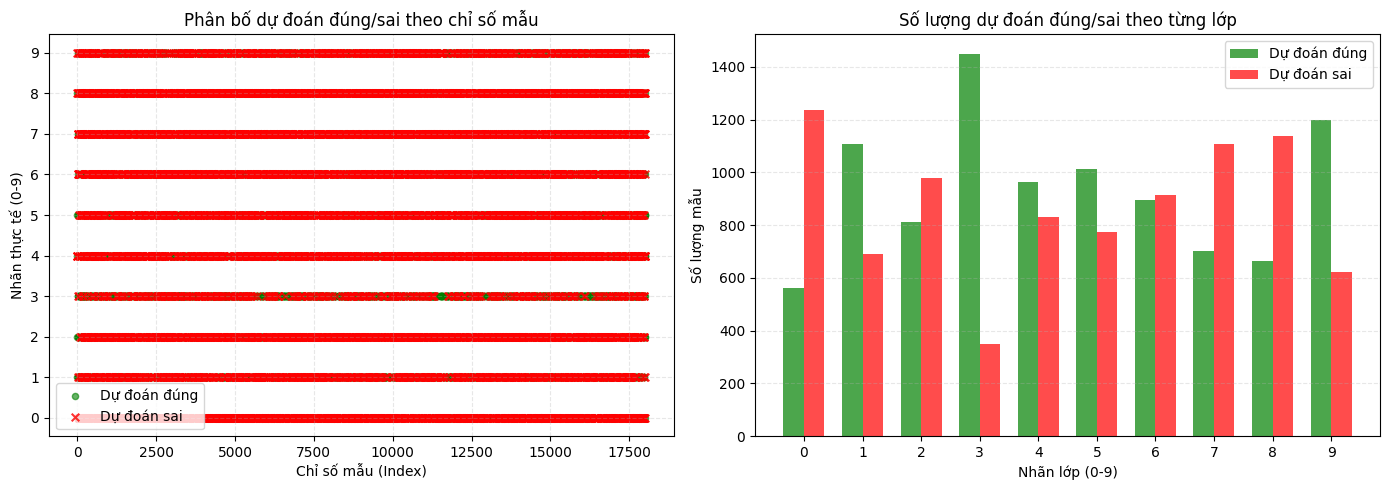

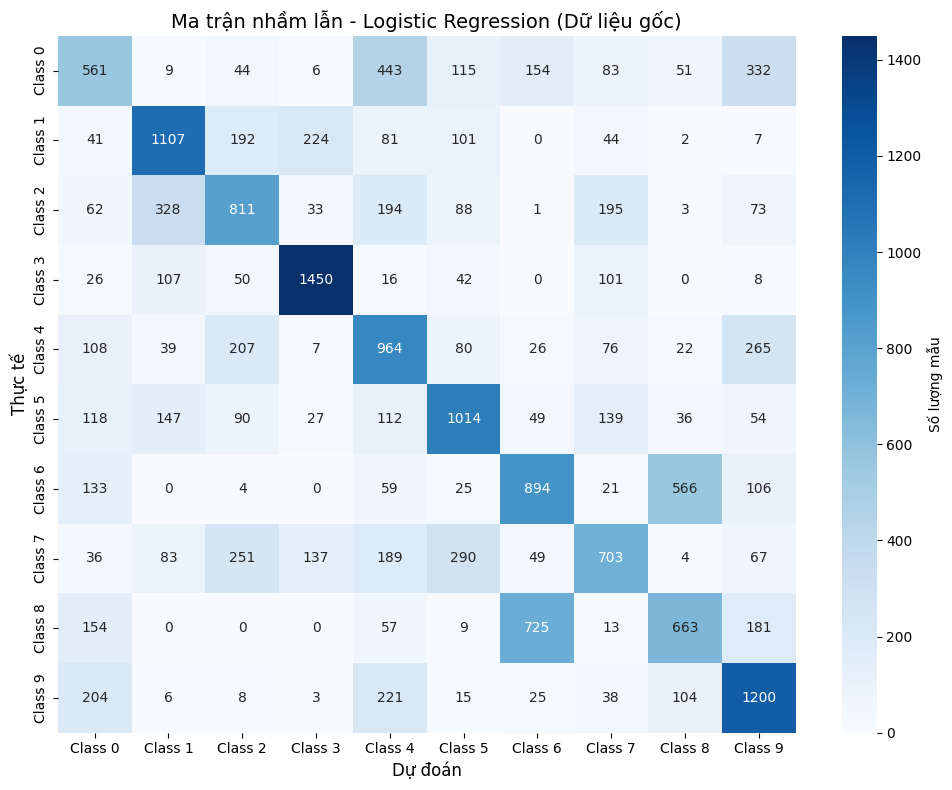

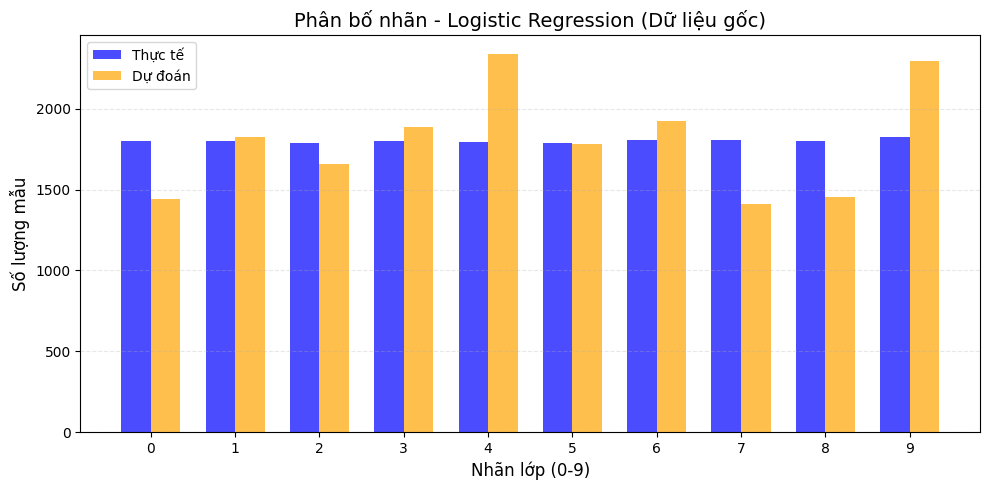

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

helper_and_plot(
    X_train, X_test, y_train, y_test,
    model=model,
    command='Logistic Regression (Dữ liệu gốc)',
    reduce_name=None  # Không giảm chiều
)

# Nhận xét tổng quan

Nhận xét tổng quan cuối cùng:

Hai phân tích đều logic, rõ ràng, có cơ sở học thuật và thực nghiệm.
Chúng bổ sung cho nhau:

Phần đầu chứng minh tính đúng đắn của mô hình.

Phần sau cho thấy hạn chế khi xử lý dữ liệu đầu vào.

➡️ Tổng thể, bài làm thể hiện hiểu biết toàn diện về mô hình Logistic Regression: từ cách hoạt động nội tại, tối ưu hóa, đến tác động của biến đổi dữ liệu (PCA) đối với hiệu năng mô hình.